# Assignment 3
## Plotting and Visualization
In this assignment we are trying to plot a reasonable curve for a bunch of known and unknown dataset. We are trying to predict the possible and use the `curve_fit` fuction to estimate if the predicted graph is accurate.

### For Dataset 1

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.optimize import curve_fit
%matplotlib inline

Text(0.5, 1.0, 'Dataset 1')

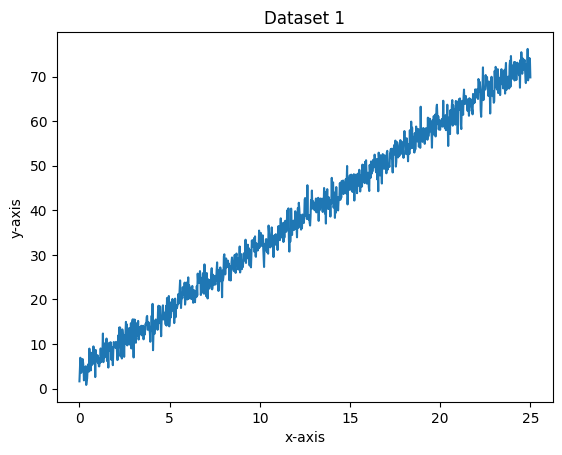

In [93]:
np_numbers = np.loadtxt(r'dataset1.txt', skiprows=0, delimiter=' ')
#Seperating the data for x-axis and y-axis
x=[]
for i in range(len(np_numbers)):
    x.append(np_numbers[i][0])
y=[]   
for i in range(len(np_numbers)):
    y.append(np_numbers[i][1])

x=np.array(x) 
y=np.array(y)

plt.plot(x,y) #This is how the dataset looks 
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Dataset 1')

Using `linalg.lstsq` for this dataset as we know that it's a straight line, with 2 parameters varying linearly with x. 

The estimated equation is 2.791124245414918 t + 3.848800101430742


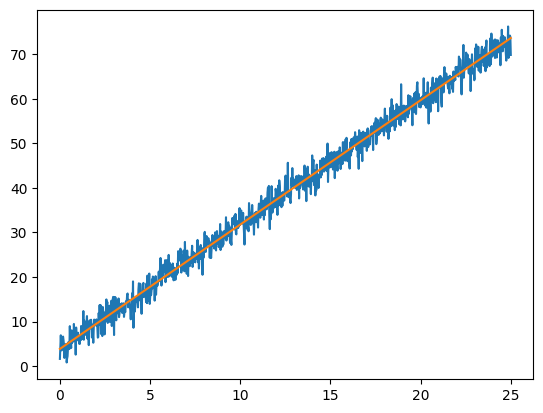

In [94]:

M = np.column_stack([x, np.ones(len(x))])
# Using the lstsq function to solve for p_1 and p_2
(p1, p2), _, _, _ = np.linalg.lstsq(M, y, rcond=None)
print(f"The estimated equation is {p1} t + {p2}")
def stline(x, m, c):
    z=[]
    for i in range(len(x)):
        z.append(p1*x[i]+p2) #defining a straight line function
    return z

yest = stline(x, p1, p2) #Plotting the obtained linear curve through lstsq
plt.plot(x,y,x,yest )

The error bar for this can be plotted as the standard deviation of the estimated value and actual value 

<magic-timeit>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


35.4 µs ± 8 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


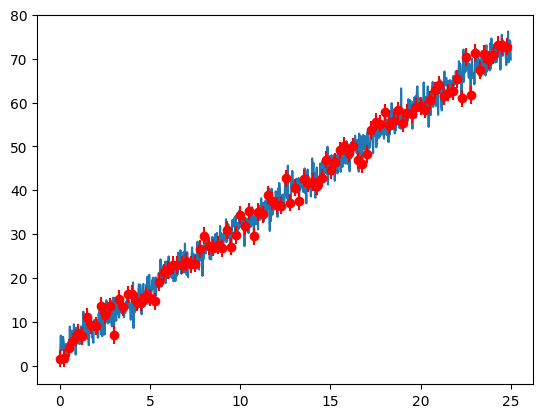

In [95]:
y_err=y-yest
plt.plot(x,y)
plt.errorbar(x[::10], y[::10], yerr=np.std(y_err), fmt='ro')
%timeit np.linalg.lstsq(M, y) #timeit function

We are using `curve_fit` on the linear fuction to check which one of these methods of drawing a graph might be feasible

Estimated function: exp(-1.0t) + 1.0


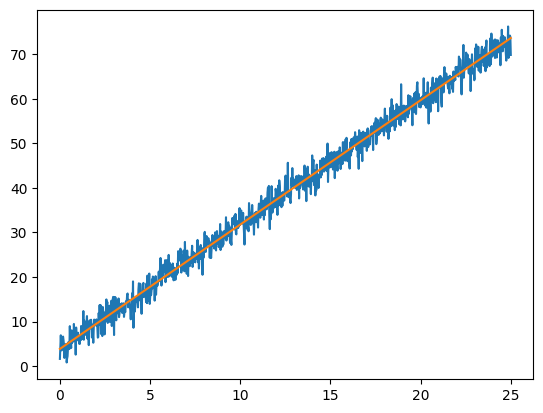

In [96]:
from scipy.optimize import curve_fit
(zp1, zp2), pcov = curve_fit( stline,x, y)
print(f"Estimated function: exp(-{zp1}t) + {zp2}")

zest = stline(x, zp1, zp2)
plt.plot(x, y, x, zest)

1.42 ms ± 32.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


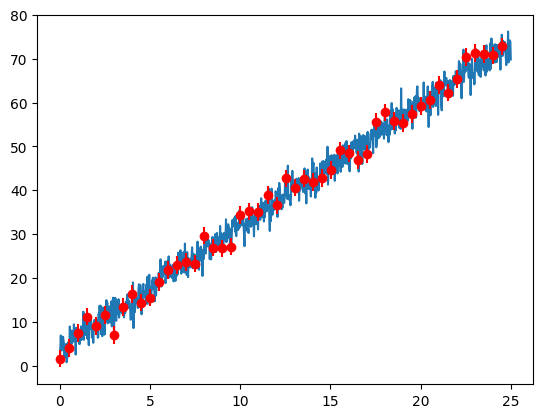

In [97]:
cuy_err=y-zest

plt.plot(x, y)
plt.errorbar(x[::20], y[::20], np.std(cuy_err), fmt='ro') #erroe bar for when curvefit used

%timeit curve_fit(stline,x, y) #timeit function

Clearly we can see that when lstsq was used for plotting cure for a known linear graph, it was much faster compared to using curvefit(which is mostly used for non-linear functions)

### For Dataset 2

Text(0.5, 1.0, 'Dataset 2')

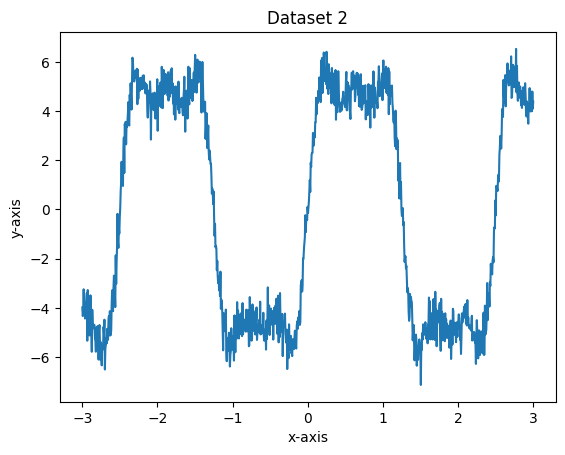

In [98]:
np_numbers = np.loadtxt(r'dataset2.txt', skiprows=0, delimiter=' ')
#Seperating the data for x-axis and y-axis
x=[]
for i in range(len(np_numbers)):
    x.append(np_numbers[i][0])
y=[]   
for i in range(len(np_numbers)):
    y.append(np_numbers[i][1])

x=np.array(x) 
y=np.array(y)

plt.plot(x,y) #This is how the dataset looks 
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Dataset 2')


Fourier series equation

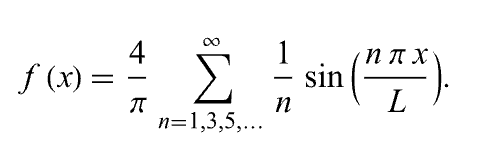

The given Dataset is said to be a Fourier series. Hence, we define functions for n=1,3,5... and see the best fit for the given data.

In [99]:
#Fourier equations
def fourier_1(x,a,l):
    return a*(4/np.pi)*(np.sin(np.pi*x/l)) #For n=1
def fourier_3(x,a,l):
    return a*(4/np.pi)*((np.sin(np.pi*x/l))+((np.sin((np.pi*x*3)/l))/3)) #For n=3
def fourier_5(x,a,l):
    return a*(4/np.pi)*((np.sin(np.pi*x/l))+((np.sin((np.pi*x*3)/l))/3)+((np.sin((np.pi*x*5)/l))/5)) #For n=5


#### For n=1

Estimated function: exp(-4.784329317633403t) + 1.2448266475990044


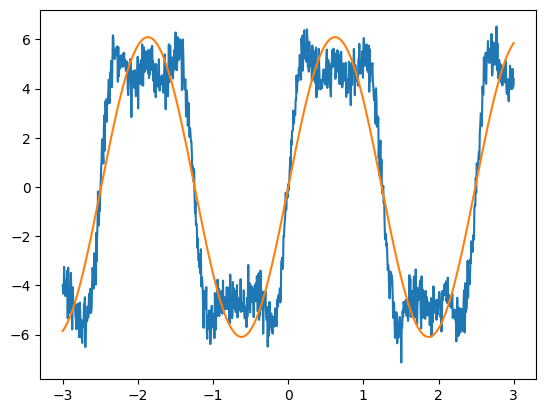

In [100]:
from scipy.optimize import curve_fit
(zp1, zp2), pcov = curve_fit( fourier_1,x, y)
print(f"Estimated function: exp(-{zp1}t) + {zp2}")
zest = fourier_1(x, zp1, zp2)
plt.plot(x, y, x, zest)

#### For n=3

Estimated function: exp(-4.695927291303469t) + 1.2473976512331715


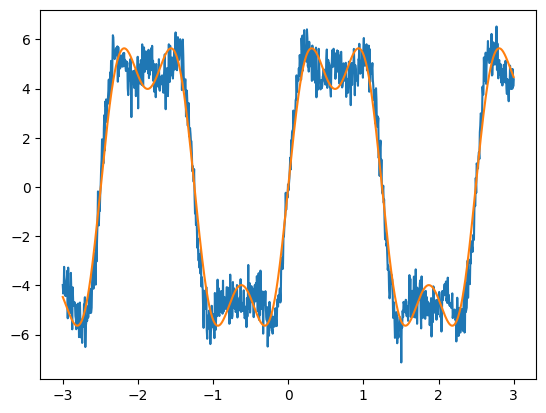

In [101]:
from scipy.optimize import curve_fit
(zp1, zp2), pcov = curve_fit( fourier_3,x, y)
print(f"Estimated function: exp(-{zp1}t) + {zp2}")
zest = fourier_3(x, zp1, zp2)
plt.plot(x, y, x, zest)

#### For n=5

Estimated function: exp(-4.695620880486891t) + 1.2506520749990966


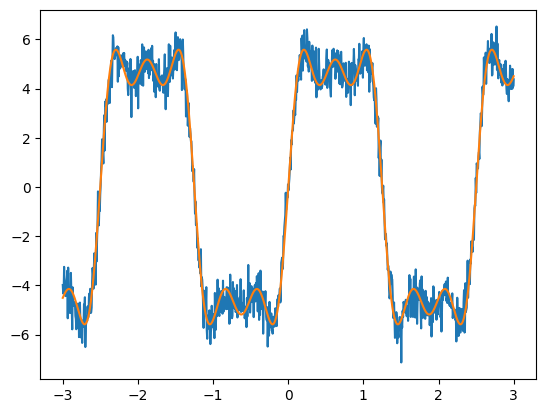

In [102]:
from scipy.optimize import curve_fit
(zp1, zp2), pcov = curve_fit( fourier_5,x, y)
print(f"Estimated function: exp(-{zp1}t) + {zp2}")
zest = fourier_5(x, zp1, zp2)
plt.plot(x, y, x, zest)

We see that at n=5, the fourier graph fits well with given data set. It now makes sense to use `fourier_5` for `curve_fit`

<ErrorbarContainer object of 3 artists>

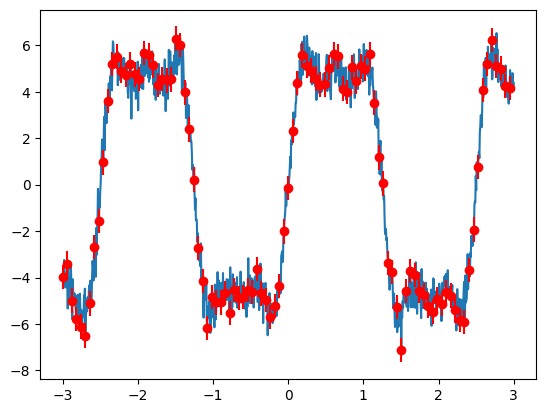

In [103]:
cuy_err=y-zest

plt.plot(x, y)
plt.errorbar(x[::10], y[::10], np.std(cuy_err), fmt='ro') #erroe bar for when curvefit used

### For Dataset 3

Text(0.5, 1.0, 'Dataset 3')

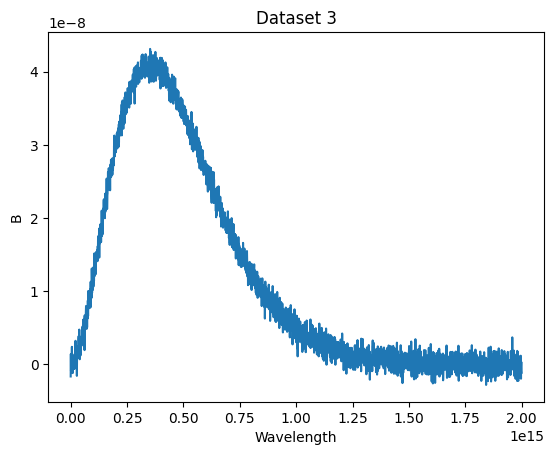

In [104]:
np_numbers = np.loadtxt(r'dataset3.txt', skiprows=0, delimiter=' ')
#Seperating the data for x-axis and y-axis
x=[]
for i in range(len(np_numbers)):
    x.append(np_numbers[i][0])
y=[]   
for i in range(len(np_numbers)):
    y.append(np_numbers[i][1])

x=np.array(x) 
y=np.array(y)

plt.plot(x,y) #This is how the dataset looks 
plt.xlabel('Wavelength')
plt.ylabel('B')
plt.title('Dataset 3')

The given dataset is said to follow Planck's law.

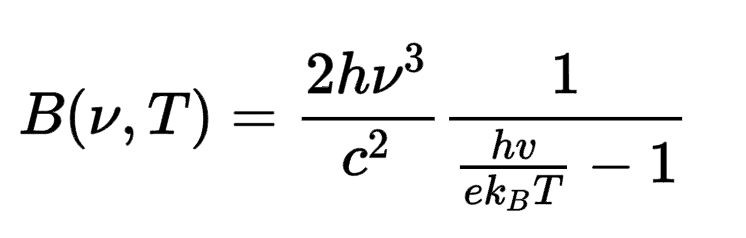

Hence, we try to define a function having frequency, temperature and planck's constant.


In [105]:
import math as m
def planck(f,h,T):
    c=3.0*(m.pow(10,8))
    kb=1.38*(m.pow(10,-23))
    
    return ((2*h*(f*f*f))/(c*c)*(1/((np.exp((h*f)/(kb*T))-1))))
    


Now, you plot the curve using `curve_fit`. 

Estimated function: exp(-6.643229758011344e-34t) + 6011.36152125128


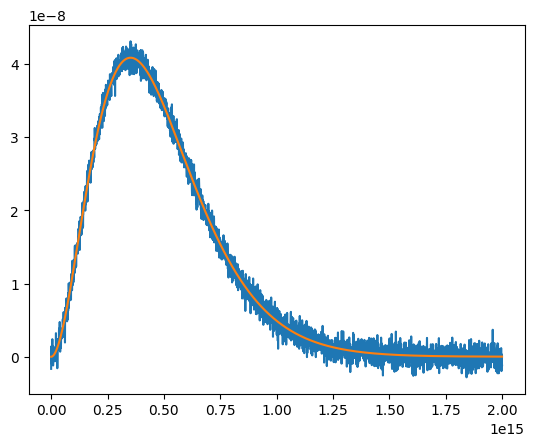

In [106]:
from scipy.optimize import curve_fit
(zp1, zp2), pcov = curve_fit( planck,x, y,p0=[6*m.pow(10,-34),300])
print(f"Estimated function: exp(-{zp1}t) + {zp2}")
zest = planck(x, zp1, zp2)
plt.plot(x, y, x, zest)

<ErrorbarContainer object of 3 artists>

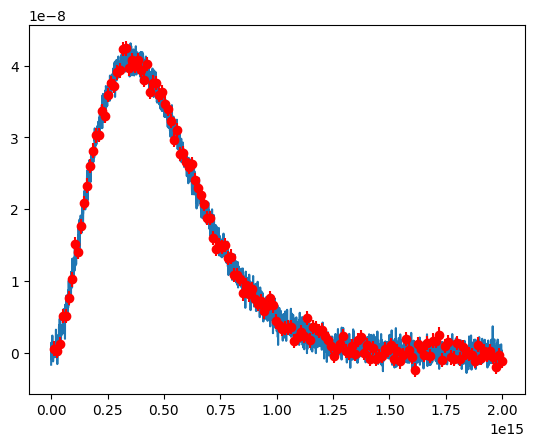

In [107]:
cuy_err=y-zest

plt.plot(x, y)
plt.errorbar(x[::20], y[::20], np.std(cuy_err), fmt='ro') #erroe bar for when curvefit used

### For Dataset 4

We do not know the nature of the the given dataset, hence we plot it using random methods to find a sequence.

Text(0.5, 1.0, 'Dataset 4')

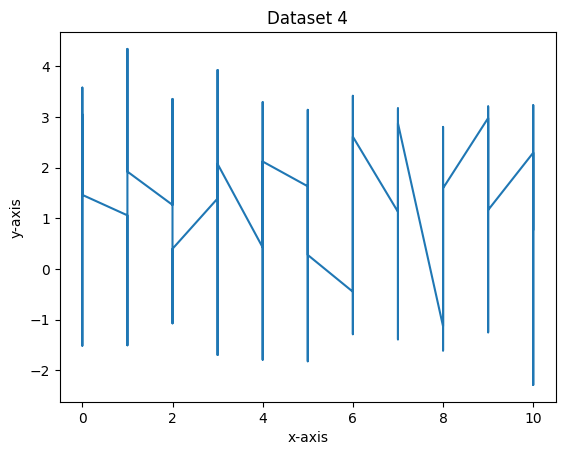

In [108]:
np_numbers = np.loadtxt('dataset4.txt', skiprows=0, delimiter=' ')
#Seperating the data for x-axis and y-axis
x=[]
for i in range(len(np_numbers)):
    x.append(np_numbers[i][0])
y=[]   
for i in range(len(np_numbers)):
    y.append(np_numbers[i][1])

x=np.array(x) 
y=np.array(y)

plt.plot(x,y) #This is how the dataset looks 
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Dataset 4')

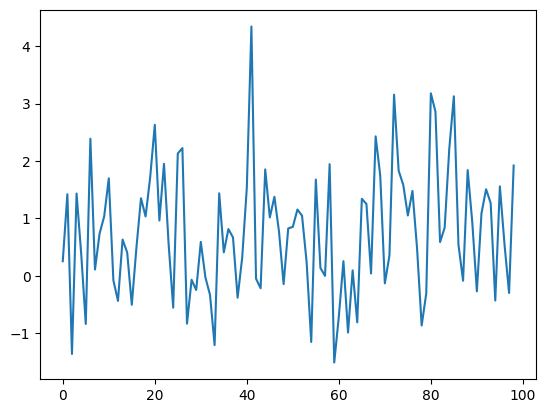

In [109]:
plt.plot(y[51:150])


(array([ 5., 10., 19., 20., 16., 18.,  5.,  4.,  1.,  1.]),
 array([-1.50648208, -0.921693  , -0.33690393,  0.24788515,  0.83267422,
         1.4174633 ,  2.00225237,  2.58704145,  3.17183053,  3.7566196 ,
         4.34140868]),
 <BarContainer object of 10 artists>)

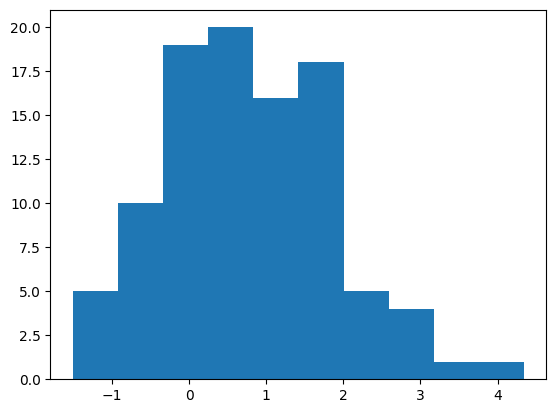

In [110]:
plt.hist(y[51:150])

(array([ 1.,  1.,  5.,  9., 16., 22., 17., 17.,  9.,  2.]),
 array([-1.79054622, -1.28246714, -0.77438805, -0.26630897,  0.24177011,
         0.74984919,  1.25792827,  1.76600735,  2.27408643,  2.78216552,
         3.2902446 ]),
 <BarContainer object of 10 artists>)

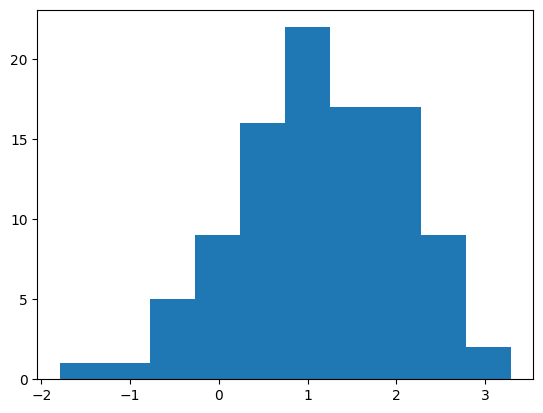

In [111]:
plt.hist(y[351:450])

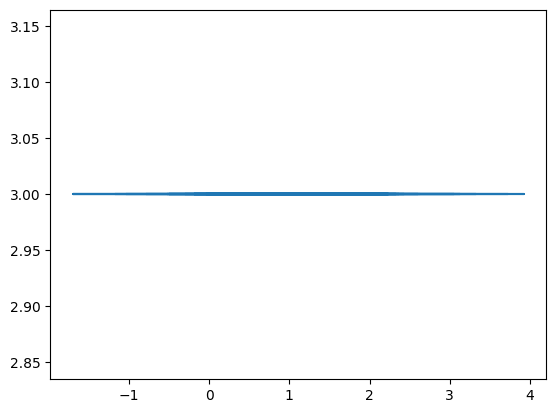

In [112]:
plt.plot(y[251:350],x[251:350])

After plotting many graphs, we see that the values of y are peaking at a value at a certain point and is almost symmentrical(not exactly).

This reminds us of 'Bell curve'. 
Now, we define a function to return the cdf of the datapoints.
And also we define an inverse cdf fuction for the fitted curve, to get data points


In [113]:
import math
def inverse_cdf(x, mean, stddev, amplitude):
    return (norm.ppf(x/amplitude)+mean)*stddev

from scipy.stats import norm

def f_cdf(x, mean, stddev, amplitude):
    return amplitude * norm.cdf((x - mean)/stddev)

inp = np.arange(0, 1, 0.01)
x_pred = []
y_mean = []
y_pred = []

#### For x=0

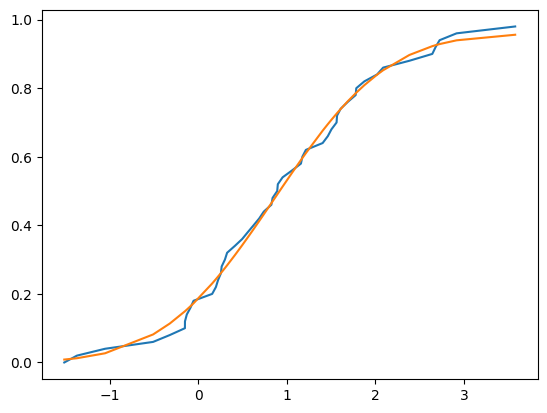

In [114]:
inpo=np.arange(0, 1, 0.02)
y_sort = sorted(y[1:51])

(mean, stddev, amplitude), cov = curve_fit(f_cdf, y_sort, inpo, p0 = [0.5, 1, 1])

plt.plot(y_sort, inpo)
plt.plot(y_sort, f_cdf(y_sort, mean, stddev, amplitude))


inverse_cdf_y = inverse_cdf(inpo, mean, stddev, amplitude)
inverse_cdf_y = [i for i in inverse_cdf_y if not math.isnan(i) and not math.isinf(i)]
y_mean.append(np.mean(inverse_cdf_y))
x_pred = x_pred + [0 for j in range(len(inverse_cdf_y))]
y_pred = y_pred + inverse_cdf_y

#### For x=1

[0.867968285719736, 0.8028339635925559]


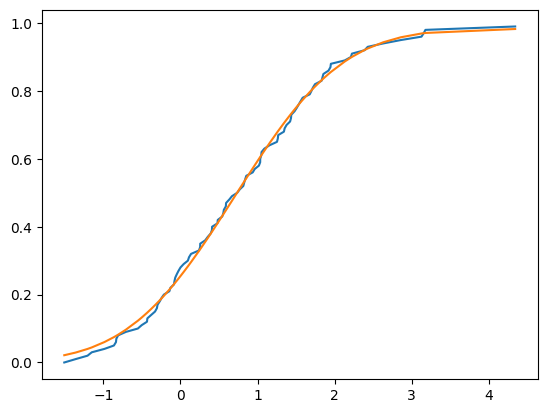

In [115]:
y_sort = sorted(y[51:151])

(mean, stddev, amplitude), cov = curve_fit(f_cdf, y_sort, inp, p0 = [0.5, 1, 1])

plt.plot(y_sort, inp)
plt.plot(y_sort, f_cdf(y_sort, mean, stddev, amplitude))


inverse_cdf_y = inverse_cdf(inp, mean, stddev, amplitude)
inverse_cdf_y = [i for i in inverse_cdf_y if not math.isnan(i) and not math.isinf(i)]
y_mean.append(np.mean(inverse_cdf_y))
print(y_mean)
x_pred = x_pred + [1 for j in range(len(inverse_cdf_y))]
y_pred = y_pred + inverse_cdf_y

Similarly we plot it for eveyinteger value of x in the dataset

#### For x=2

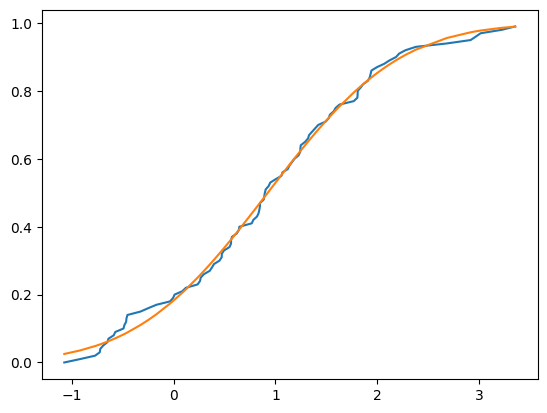

In [116]:
y_sort = sorted(y[151:251])

(mean, stddev, amplitude), cov = curve_fit(f_cdf, y_sort, inp, p0 = [0.5, 1, 1])

plt.plot(y_sort, inp)
plt.plot(y_sort, f_cdf(y_sort, mean, stddev, amplitude))


inverse_cdf_y = inverse_cdf(inp, mean, stddev, amplitude)
inverse_cdf_y = [i for i in inverse_cdf_y if not math.isnan(i) and not math.isinf(i)]
y_mean.append(np.mean(inverse_cdf_y))

x_pred = x_pred + [2 for j in range(len(inverse_cdf_y))]
y_pred = y_pred + inverse_cdf_y

#### For x=3

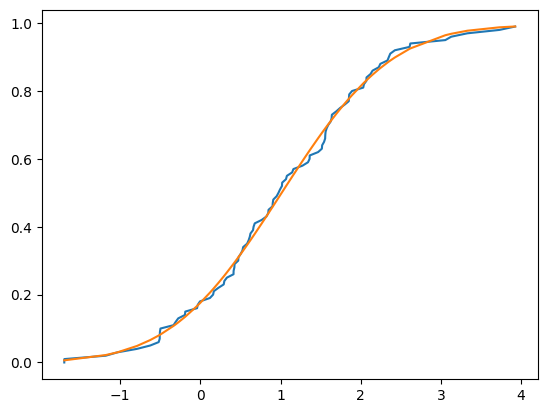

In [117]:
y_sort = sorted(y[251:351])

(mean, stddev, amplitude), cov = curve_fit(f_cdf, y_sort, inp, p0 = [0.5, 1, 1])

plt.plot(y_sort, inp)
plt.plot(y_sort, f_cdf(y_sort, mean, stddev, amplitude))


inverse_cdf_y = inverse_cdf(inp, mean, stddev, amplitude)
inverse_cdf_y = [i for i in inverse_cdf_y if not math.isnan(i) and not math.isinf(i)]
y_mean.append(np.mean(inverse_cdf_y))

x_pred = x_pred + [3 for j in range(len(inverse_cdf_y))]
y_pred = y_pred + inverse_cdf_y

#### For x=4

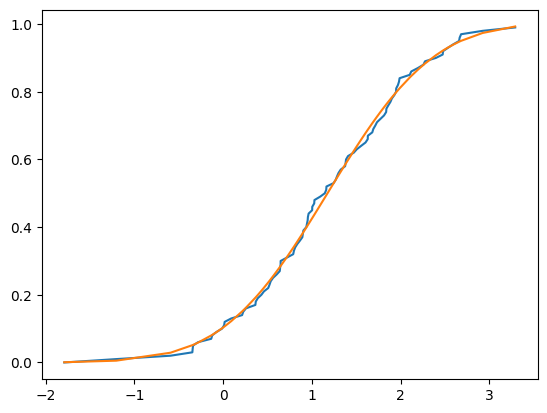

In [118]:
y_sort = sorted(y[351:451])

(mean, stddev, amplitude), cov = curve_fit(f_cdf, y_sort, inp, p0 = [0.5, 1, 1])

plt.plot(y_sort, inp)
plt.plot(y_sort, f_cdf(y_sort, mean, stddev, amplitude))


inverse_cdf_y = inverse_cdf(inp, mean, stddev, amplitude)
inverse_cdf_y = [i for i in inverse_cdf_y if not math.isnan(i) and not math.isinf(i)]
y_mean.append(np.mean(inverse_cdf_y))

x_pred = x_pred + [4 for j in range(len(inverse_cdf_y))]
y_pred = y_pred + inverse_cdf_y

#### For x=5

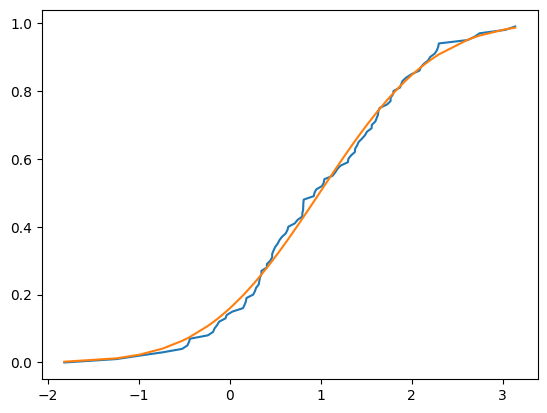

In [119]:
y_sort = sorted(y[451:551])

(mean, stddev, amplitude), cov = curve_fit(f_cdf, y_sort, inp, p0 = [0.5, 1, 1])

plt.plot(y_sort, inp)
plt.plot(y_sort, f_cdf(y_sort, mean, stddev, amplitude))


inverse_cdf_y = inverse_cdf(inp, mean, stddev, amplitude)
inverse_cdf_y = [i for i in inverse_cdf_y if not math.isnan(i) and not math.isinf(i)]
y_mean.append(np.mean(inverse_cdf_y))

x_pred = x_pred + [5 for j in range(len(inverse_cdf_y))]
y_pred = y_pred + inverse_cdf_y

#### For x=6

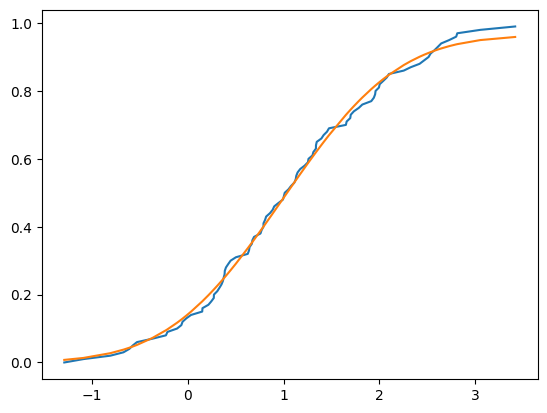

In [120]:
y_sort = sorted(y[551:651])

(mean, stddev, amplitude), cov = curve_fit(f_cdf, y_sort, inp, p0 = [0.5, 1, 1])

plt.plot(y_sort, inp)
plt.plot(y_sort, f_cdf(y_sort, mean, stddev, amplitude))


inverse_cdf_y = inverse_cdf(inp, mean, stddev, amplitude)
inverse_cdf_y = [i for i in inverse_cdf_y if not math.isnan(i) and not math.isinf(i)]
y_mean.append(np.mean(inverse_cdf_y))

x_pred = x_pred + [6 for j in range(len(inverse_cdf_y))]
y_pred = y_pred + inverse_cdf_y

#### For x=7

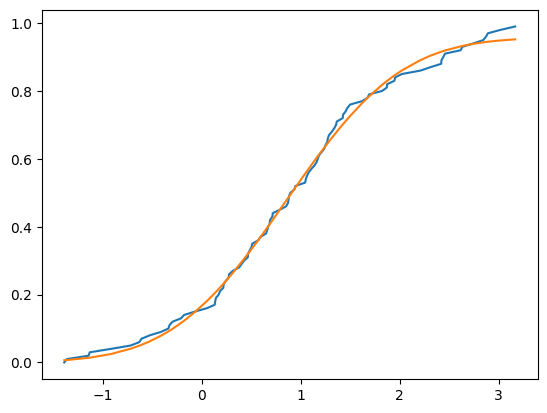

In [121]:
y_sort = sorted(y[651:751])

(mean, stddev, amplitude), cov = curve_fit(f_cdf, y_sort, inp, p0 = [0.5, 1, 1])

plt.plot(y_sort, inp)
plt.plot(y_sort, f_cdf(y_sort, mean, stddev, amplitude))


inverse_cdf_y = inverse_cdf(inp, mean, stddev, amplitude)
inverse_cdf_y = [i for i in inverse_cdf_y if not math.isnan(i) and not math.isinf(i)]
y_mean.append(np.mean(inverse_cdf_y))

x_pred = x_pred + [7 for j in range(len(inverse_cdf_y))]
y_pred = y_pred + inverse_cdf_y

#### For x=8

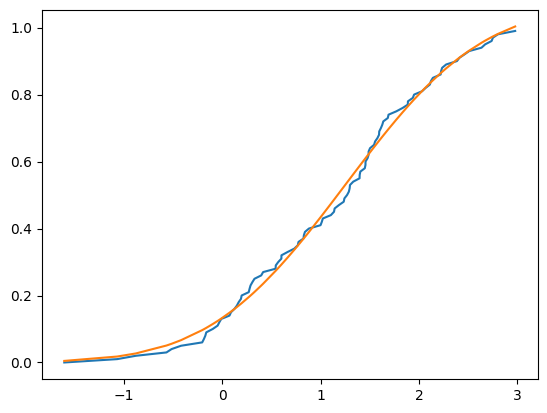

In [122]:
y_sort = sorted(y[751:851])

(mean, stddev, amplitude), cov = curve_fit(f_cdf, y_sort, inp, p0 = [0.5, 1, 1])

plt.plot(y_sort, inp)
plt.plot(y_sort, f_cdf(y_sort, mean, stddev, amplitude))


inverse_cdf_y = inverse_cdf(inp, mean, stddev, amplitude)
inverse_cdf_y = [i for i in inverse_cdf_y if not math.isnan(i) and not math.isinf(i)]
y_mean.append(np.mean(inverse_cdf_y))

x_pred = x_pred + [8 for j in range(len(inverse_cdf_y))]
y_pred = y_pred + inverse_cdf_y

#### For x=9

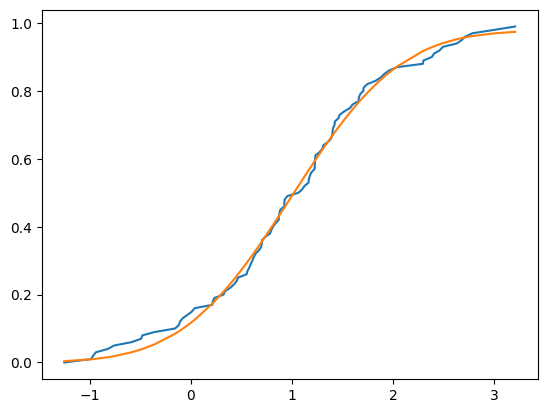

In [123]:
y_sort = sorted(y[851:951])

(mean, stddev, amplitude), cov = curve_fit(f_cdf, y_sort, inp, p0 = [0.5, 1, 1])

plt.plot(y_sort, inp)
plt.plot(y_sort, f_cdf(y_sort, mean, stddev, amplitude))


inverse_cdf_y = inverse_cdf(inp, mean, stddev, amplitude)
inverse_cdf_y = [i for i in inverse_cdf_y if not math.isnan(i) and not math.isinf(i)]
y_mean.append(np.mean(inverse_cdf_y))

x_pred = x_pred + [9 for j in range(len(inverse_cdf_y))]
y_pred = y_pred + inverse_cdf_y

#### For x=10

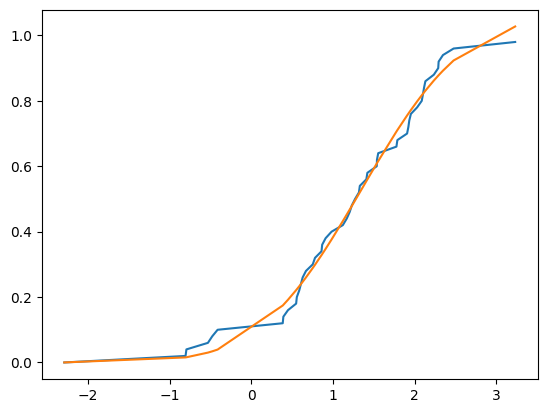

In [124]:

y_sort = sorted(y[950:1000])

(mean, stddev, amplitude), cov = curve_fit(f_cdf, y_sort, inpo, p0 = [0.5, 1, 1])

plt.plot(y_sort, inpo)
plt.plot(y_sort, f_cdf(y_sort, mean, stddev, amplitude))


inverse_cdf_y = inverse_cdf(inpo, mean, stddev, amplitude)
inverse_cdf_y = [i for i in inverse_cdf_y if not math.isnan(i) and not math.isinf(i)]
y_mean.append(np.mean(inverse_cdf_y))
x_pred = x_pred + [10 for j in range(len(inverse_cdf_y))]
y_pred = y_pred + inverse_cdf_y

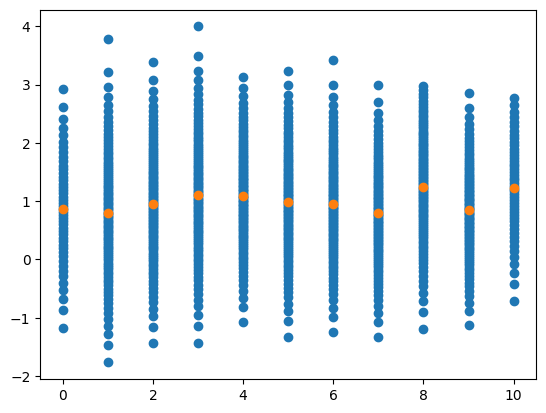

In [125]:
x_un=[i for i in range(11)]    

plt.scatter(x_pred,y_pred)
plt.scatter(x_un,y_mean)


The orange highlighted datapoints are the mean points of the predicted y values for a given x from the Gaussian curve predicted from through `curve_fit`. Now I tried to fit them using a straight line and this is the acquired curve.

Estimated function: exp(-0.018704187577556874t) + 0.8929939862598517


(-2.0, 4.0)

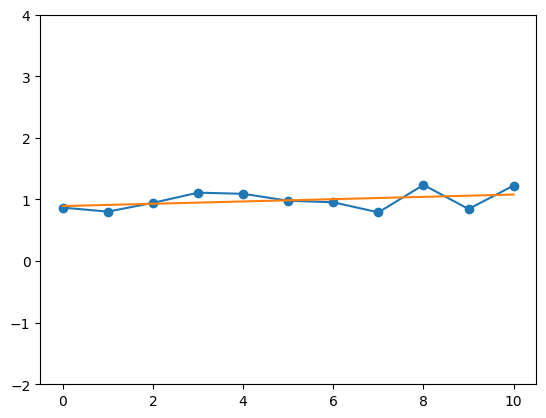

In [126]:
from scipy.optimize import curve_fit
def stline(x, m, c): #defining a straight line function
    return m*x + c
(zp1, zp2), pcov = curve_fit( stline,x_un, y_mean)
print(f"Estimated function: exp(-{zp1}t) + {zp2}")
z_est = stline(np.array(x_un), zp1, zp2)
plt.plot(x_un, y_mean,x_un, z_est)
plt.scatter(x_un,y_mean)
plt.ylim(-2,4)